In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [33]:
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)

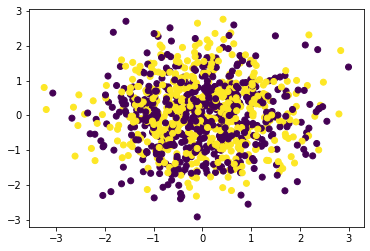

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)

In [112]:
class NaiveBayes:
    
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        #init mean, priors, var
        self._mean = np.zeros((n_classes,n_features), dtype=np.float64)
        self._var = np.zeros((n_classes,n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for c in self._classes:
            X_c = X[c==y]
            self._mean[c,:] = X_c.mean(axis=0)
            self._var[c,:] = X_c.var(axis=0)
            self._priors[c] = X_c.shape[0]/float(n_samples)
    
    def predict(self,X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
    
    def _predict(self,X):
        posteriors = []
        
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, X)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        return self._classes[np.argmax(posteriors)]
                 
            
    def _pdf(self,class_idx,x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
            

In [113]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

In [115]:
print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965
